In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.04G/1.06G [00:10<00:00, 217MB/s]
100% 1.06G/1.06G [00:10<00:00, 106MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from keras.optimizers import Adam, SGD

In [ ]:
import os
import shutil

# Define paths
train_dir = "/content/train"
test_dir = "/content/test"
train_subset = "/content/train_subset"
test_subset = "/content/test_subset"

# Function to copy 1000 images per category
def copy_images(src, dest, category):
    os.makedirs(os.path.join(dest, category), exist_ok=True)
    images = os.listdir(os.path.join(src, category))[:250]
    for img in images:
        shutil.copy(os.path.join(src, category, img), os.path.join(dest, category, img))

# Copy images for both categories
for category in ["cats", "dogs"]:
    # copy_images(train_dir, train_subset, category)
    copy_images(test_dir, test_subset, category)

print("Done!")


Done!


In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train_subset',
    labels = 'inferred',
    label_mode = 'int',
    # batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test_subset',
    labels = 'inferred',
    label_mode = 'int',
    # batch_size = 32,
    image_size = (256,256)
)

Found 2000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [ ]:
def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(32, kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,686,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,733,217 (14.24 MB)

 Trainable params: 3,732,961 (14.24 MB)

 Non-trainable params: 256 (1.00 KB)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 176ms/step - accuracy: 0.5338 - loss: 1.5812 - val_accuracy: 0.5380 - val_loss: 1.1461
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.5783 - loss: 0.8863 - val_accuracy: 0.5000 - val_loss: 3.3923
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - accuracy: 0.6273 - loss: 0.7402 - val_accuracy: 0.4960 - val_loss: 1.4024
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.6761 - loss: 0.6916 - val_accuracy: 0.5640 - val_loss: 0.6969
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - accuracy: 0.7609 - loss: 0.5027 - val_accuracy: 0.4980 - val_loss: 0.9737
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.8219 - loss: 0.3885 - val_accuracy: 0.5900 - val_loss: 0.9249
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.8503 - loss: 0.3383 - val_accuracy: 0.6300 - val_loss: 0.8389
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - accuracy: 0.9128 - loss: 0.2229 - val_accuracy: 0.6060 -

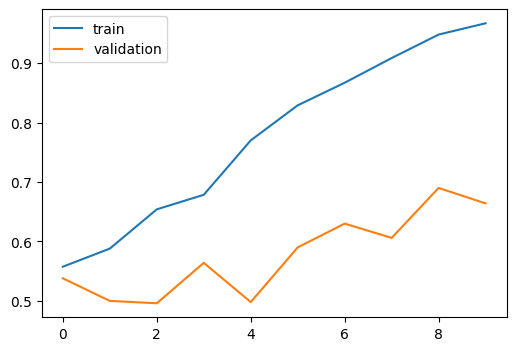

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

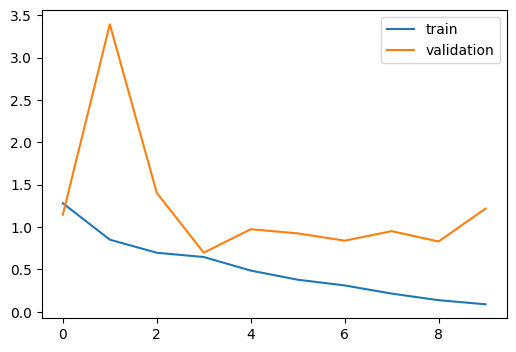

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

In [ ]:
model2 = Sequential([
    Conv2D(32, kernel_size=(5,5),padding='valid',activation='relu',input_shape=(256,256,3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),

    Conv2D(64, kernel_size=(5,5),padding='valid',activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),

    Conv2D(64, kernel_size=(5,5),padding='valid',activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.1),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])

In [ ]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 28s 254ms/step - accuracy: 0.5204 - loss: 3.2581 - val_accuracy: 0.5180 - val_loss: 1.9756
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - accuracy: 0.5424 - loss: 2.4161 - val_accuracy: 0.4800 - val_loss: 1.1989
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 82ms/step - accuracy: 0.5407 - loss: 1.2152 - val_accuracy: 0.4720 - val_loss: 1.3193
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.5882 - loss: 0.9622 - val_accuracy: 0.5680 - val_loss: 0.8246
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.6236 - loss: 0.7209 - val_accuracy: 0.5840 - val_loss: 0.8532
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 93ms/step - accuracy: 0.7055 - loss: 0.6380 - val_accuracy: 0.6060 - val_loss: 0.8348
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 82ms/step - accuracy: 0.7326 - loss: 0.5362 - val_accuracy: 0.6000 - val_loss: 0.7686
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.7622 - loss: 0.4919 - val_accuracy: 0.6

In [ ]:
model3 = Sequential([
    Conv2D(32, kernel_size=(5,5),padding='valid',activation='relu',input_shape=(256,256,3)),
    MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),

    Conv2D(64, kernel_size=(5,5),padding='valid',activation='relu'),
    MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),

    Conv2D(128, kernel_size=(5,5),padding='valid',activation='relu'),
    MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),

    Flatten(),

    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model3.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 158ms/step - accuracy: 0.4727 - loss: 0.7636 - val_accuracy: 0.5180 - val_loss: 0.6916
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.5423 - loss: 0.6877 - val_accuracy: 0.5440 - val_loss: 0.7258
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - accuracy: 0.5742 - loss: 0.6749 - val_accuracy: 0.5500 - val_loss: 0.7794
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.6133 - loss: 0.6458 - val_accuracy: 0.5120 - val_loss: 0.7164
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.6890 - loss: 0.5878 - val_accuracy: 0.5560 - val_loss: 0.7602
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.7612 - loss: 0.4694 - val_accuracy: 0.5620 - val_loss: 1.1677
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.8660 - loss: 0.2985 - val_accuracy: 0.5680 - val_loss: 1.7185
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - accuracy: 0.9374 - loss: 0.1644 - val_accuracy: 0.574

In [ ]:
model4 = Sequential([
    Conv2D(32, kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)),
    MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),

    Conv2D(64, kernel_size=(3,3),padding='valid',activation='relu'),
    MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),

    Conv2D(128, kernel_size=(3,3),padding='valid',activation='relu'),
    MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),

    Flatten(),

    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model4.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 123ms/step - accuracy: 0.5067 - loss: 0.8114 - val_accuracy: 0.5000 - val_loss: 0.6942
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step - accuracy: 0.5059 - loss: 0.6929 - val_accuracy: 0.5500 - val_loss: 0.6915
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.5450 - loss: 0.6887 - val_accuracy: 0.6280 - val_loss: 0.6701
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.6311 - loss: 0.6703 - val_accuracy: 0.6640 - val_loss: 0.6325
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.7213 - loss: 0.5724 - val_accuracy: 0.6760 - val_loss: 0.7134
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 0.7759 - loss: 0.4554 - val_accuracy: 0.6000 - val_loss: 1.1272
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.8607 - loss: 0.3363 - val_accuracy: 0.6260 - val_loss: 1.2973
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.9070 - loss: 0.2087 - val_accuracy: 0.6540 

In [ ]:
model4.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
model4.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.5344 - loss: 3.1021 - val_accuracy: 0.5000 - val_loss: 0.6936
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.4933 - loss: 0.6938 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - accuracy: 0.4797 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.4953 - loss: 0.6935 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.4909 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.4919 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.4759 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - accuracy: 0.4826 - loss: 0.6935 - val_accuracy: 0.5000 - v

In [ ]:
model5 = Sequential([
    Conv2D(32, kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)),
    MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),

    Conv2D(64, kernel_size=(3,3),padding='valid',activation='relu'),
    MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),

    Conv2D(128, kernel_size=(3,3),padding='valid',activation='relu'),
    MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),

    Flatten(),

    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model5.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])
model5.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step - accuracy: 0.4636 - loss: 0.6995 - val_accuracy: 0.5420 - val_loss: 0.6921
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.5354 - loss: 0.6915 - val_accuracy: 0.5200 - val_loss: 0.6920
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.5249 - loss: 0.6922 - val_accuracy: 0.5180 - val_loss: 0.6923
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.5299 - loss: 0.6907 - val_accuracy: 0.5820 - val_loss: 0.6863
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.5576 - loss: 0.6864 - val_accuracy: 0.5340 - val_loss: 0.6881
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.5834 - loss: 0.6850 - val_accuracy: 0.5580 - val_loss: 0.6823
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.5633 - loss: 0.6819 - val_accuracy: 0.5860 - val_loss: 0.6773
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.5970 - loss: 0.6771 - val_accuracy: 0.5520 - v

In [ ]:
model5.fit(train_ds, epochs=20, validation_data=validation_ds)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 0.6191 - loss: 0.6570 - val_accuracy: 0.6040 - val_loss: 0.6646
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - accuracy: 0.6118 - loss: 0.6527 - val_accuracy: 0.5020 - val_loss: 0.7494
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.5998 - loss: 0.6631 - val_accuracy: 0.6280 - val_loss: 0.6521
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.6260 - loss: 0.6418 - val_accuracy: 0.6420 - val_loss: 0.6431
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.6515 - loss: 0.6334 - val_accuracy: 0.5520 - val_loss: 0.6792
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.6387 - loss: 0.6319 - val_accuracy: 0.6380 - val_loss: 0.6331
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.6739 - loss: 0.6153 - val_accuracy: 0.6240 - val_loss: 0.6234
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.6685 - loss: 0.6066 - val_accuracy: 0.6500 - v

In [ ]:
model5.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 0.8392 - loss: 0.3948 - val_accuracy: 0.7100 - val_loss: 0.6047
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.8576 - loss: 0.3457 - val_accuracy: 0.6980 - val_loss: 0.6665
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.8588 - loss: 0.3449 - val_accuracy: 0.6460 - val_loss: 0.7840
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.8684 - loss: 0.3256 - val_accuracy: 0.7040 - val_loss: 0.6700
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - accuracy: 0.9083 - loss: 0.2513 - val_accuracy: 0.7100 - val_loss: 0.7004
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.9267 - loss: 0.2117 - val_accuracy: 0.6680 - val_loss: 0.8563
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.8661 - loss: 0.3178 - val_accuracy: 0.6840 - val_loss: 0.7472
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - accuracy: 0.9404 - loss: 0.1850 - val_accuracy: 0.6820 - v

In [ ]:
import joblib
joblib.dump(model4, 'catvsdog')

['catvsdog']

In [ ]:
cat_dog_model = joblib.load('catvsdog')

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/cat3.jpg')

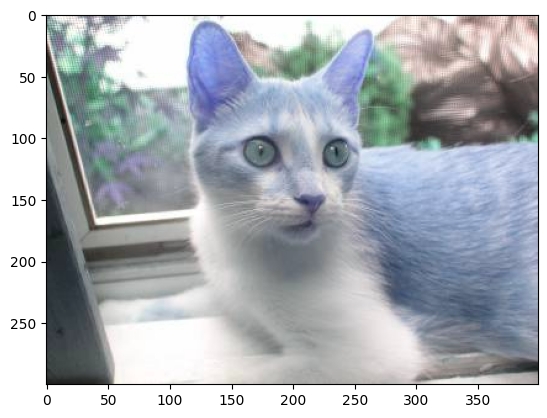

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(300, 399, 3)

In [ ]:
test_img = cv2.resize(test_img, (256, 256))

In [ ]:
test_img_input = test_img.reshape((1, 256, 256, 3))

In [ ]:
cat_dog_model.predict(test_img_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


array([[0.]], dtype=float32)